<div style="text-align: center;">

# <a id='toc1_'></a>[MACHINE LEARNING PROJECT](#toc0_)
## <a id='toc1_'></a>[Deliverable #1](#toc0_)

**<h3 align="center">Cars 4 You: Expediting Car Evaluations with ML</h3>**

<span style="font-size: 24px;">Master in Data Science and Advanced Analytics</span>  
<span style="font-size: 24px;">NOVA Information Management School</span>  
<span style="font-size: 20px;"><i>Group 34</i></span>  
<span style="font-size: 20px;">Fall/Spring Semester 2025-2026</span>

</div>

---

  
|      |     Student Name     |     Student ID     |     Student Email     | 
|---   |         ---          |           ---          |           ---          |
| 1    |     Carolina Luz      |   20250409        |   [20250409@novaims.unl.pt](mailto:20250409@novaims.unl.pt)        | 
| 2    |     Margarida Quintino  |   20250411        |   [20250411@novaims.unl.pt](mailto:20250411@novaims.unl.pt)     |   
| 3    |     Pedro Castro      |       20250467     |       [20250467@novaims.unl.pt](mailto:20250467@novaims.unl.pt)     |
| 3    |     Pedro Carrasqueira    |    20250488         |    [20250488@novaims.unl.pt](mailto:20250488@novaims.unl.pt)         |

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)

## 2. Import dataset

In [2]:
train_data = pd.read_csv("/work/train.csv")
test_data = pd.read_csv("/work/test.csv")

In [3]:
train_data.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [4]:
train_data.shape

(75973, 14)

In [5]:
count_data = train_data.columns.values
print(count_data)

['carID' 'Brand' 'model' 'year' 'price' 'transmission' 'mileage'
 'fuelType' 'tax' 'mpg' 'engineSize' 'paintQuality%' 'previousOwners'
 'hasDamage']


In [6]:
train_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carID,75973.0,NaN,NaN,NaN,37986.0,21931.660338,0.0,18993.0,37986.0,56979.0,75972.0
Brand,74452,72,Ford,14808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,74456,735,Focus,6353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,74482.0,NaN,NaN,NaN,2017.096611,2.208704,1970.0,2016.0,2017.0,2019.0,2024.121759
price,75973.0,NaN,NaN,NaN,16881.889553,9736.926322,450.0,10200.0,14699.0,20950.0,159999.0
transmission,74451,40,Manual,38050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,74510.0,NaN,NaN,NaN,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.0
fuelType,74462,34,Petrol,37995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,68069.0,NaN,NaN,NaN,120.329078,65.521176,-91.12163,125.0,145.0,145.0,580.0
mpg,68047.0,NaN,NaN,NaN,55.152666,16.497837,-43.421768,46.3,54.3,62.8,470.8


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [8]:
train_data.dtypes

carID               int64
Brand              object
model              object
year              float64
price               int64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage         float64
dtype: object

## 3. Metadata

### Index
* `carID`: An attribute that contains an identifier for each car.

### Categorical Data
* `Brand`: year mileage The car’s main brand (e.g. Ford, Toyota)
* `model`: The car model
* `transmission`: The type of transmission (Manual or Automatic)
* `fuelType`: Type of Fuel used by the car (Diesel, Petrol, Hybrid,Electric)
* `hasDamage`: Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not.

### Numerical Data
* `price`: The car’s price when purchased by Cars 4 You (in £).  
* `year`: The year of Registration of the Car
* `mileage`: The total reported distance travelled by the car (in miles)
* `tax`: The amount of road tax (in £) that, in 2020, was applicable to the car in question.
* `mpg`: Average Miles per Gallon
* `engineSize`: Size of Engine in liters (Cubic Decimeters)
* `paintQuality%`: The mechanic’s assessment of the cars’ overall paint quality and hull integrity (filled by the mechanic during evaluation).
* `previousOwners`: Number of previous registered owners of the vehicle.

## 3. Duplicates

In [9]:
# Verify duplicate values on 'carID'
carID_duplicates = train_data[train_data['carID'].duplicated(keep=False)]['carID'].value_counts()
carID_duplicates

Series([], Name: count, dtype: int64)

The **carID** column looked like a good candidate to be set as an index, since is an unique value. However we don't know if the data didn't have any duplicates, so we evaluated that and verified that there are no duplicates, so the **carID** was set as the index.

In [10]:
# Set index to carID
train_data = pd.DataFrame(train_data).set_index('carID')
train_data.head()

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


## 4. Missing Values

In [11]:
train_data.isna().sum()

Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

In [12]:
# Showing percentage of missing values in each column
((train_data.isna().sum() / train_data.shape[0])*100).round(2)

Brand              2.00
model              2.00
year               1.96
price              0.00
transmission       2.00
mileage            1.93
fuelType           1.99
tax               10.40
mpg               10.43
engineSize         2.00
paintQuality%      2.01
previousOwners     2.04
hasDamage          2.04
dtype: float64

**price**, **transmission** and **fuelType** don't have any 

In [13]:
train_data[train_data['fuelType'] == 'Hybrid']

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
55065,Toyota,C-HR,2017.0,15490,Automatic,59000.0,Hybrid,0.0,74.3,1.8,95.0,2.0,0.0
54783,Toyota,Yaris,2014.0,10490,Automatic,34528.0,Hybrid,0.0,80.7,1.5,79.0,1.0,0.0
33625,Hyundai,Ioniq,2017.0,17795,Automatic,NaN,Hybrid,135.0,78.5,1.6,54.0,0.0,0.0
34990,Mercedes,S Class,2017.0,36890,Automatic,22657.0,Hybrid,20.0,61.4,2.1,54.0,4.0,0.0
71321,VW,Golf,2017.0,22000,Automatic,28385.0,Hybrid,135.0,156.9,1.4,49.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51663,Toyota,Auris,2017.0,13498,Automatic,30468.0,Hybrid,135.0,72.4,1.8,74.0,2.0,0.0
55680,Toyota,C-HR,2017.0,20700,Automatic,NaN,Hybrid,135.0,74.3,1.8,86.0,0.0,0.0
52733,Toyota,RAV4,2016.0,19995,Automatic,31186.0,Hybrid,20.0,57.6,2.5,74.0,1.0,0.0


In [14]:
#Analyse typos in the Brand column
print(train_data['Brand'].value_counts().to_string())

Brand
Ford        14808
Mercedes    10754
VW           9780
Opel         8645
BMW          6968
Audi         6749
Toyota       4289
Skoda        3973
Hyundai      3066
FORD          316
ord           315
ford          307
For           293
ercedes       233
mercedes      228
MERCEDES      227
Mercede       215
W             203
V             197
vw            193
Ope           180
pel           178
OPEL          169
opel          165
MW            145
AUDI          144
udi           143
Aud           142
BM            141
audi          135
bmw           134
skoda          93
oyota          91
toyota         84
TOYOTA         82
koda           80
Skod           79
SKODA          72
Toyot          72
HYUNDAI        72
yundai         68
hyundai        63
Hyunda         59
v               7
or              7
ercede          7
for             7
ORD             5
FOR             5
w               5
ope             4
MERCEDE         4
OPE             4
mw              4
UDI             4
pe  

In [15]:
# Normalize the names on the Brand column
train_data['Brand'] = train_data['Brand'].str.strip().str.lower()

#Deterministic dictionary for obvious variants
mapping = {
    #ford
    'for' : 'ford', 'ord' : 'ford', 'or' : 'ford',
    #mercedes
    'ercedes' : 'mercedes', 'mercede' : 'mercedes', 'ercede' : 'mercedes',
    #volkswagen
    'vw' : 'volkswagen', 'v' : 'volkswagen', 'w' : 'volkswagen', #we verified that all the models of "w" were volkswagen models, not bmw.
    #opel
    'ope' : 'opel', 'pel' : 'opel', 'pe' : 'opel',
    #bmw
    'mw' : 'bmw', 'bm' : 'bmw',
    #audi
    'aud' : 'audi', 'udi' : 'audi', 'ud' : 'audi',
    #toyota
    'oyota' : 'toyota', 'toyot' : 'toyota',
    #skoda
    'koda' : 'skoda', 'skod' : 'skoda', 'kod' : 'skoda',
    #hyundai
    'yundai' : 'hyundai', 'hyunda' : 'hyundai', 'yunda' : 'hyundai'
}

# Apply the mapping to correct the brand names
train_data['Brand'] = train_data['Brand'].replace(mapping)

# Verify the changes
print(train_data['Brand'].value_counts().to_string())

Brand
ford          16063
mercedes      11674
volkswagen    10385
opel           9352
bmw            7392
audi           7325
toyota         4622
skoda          4303
hyundai        3336


In [16]:
train_data.groupby('transmission')['tax'].apply(lambda x: x.isna().sum())

transmission
 MANUAL         1
 Manual         1
 Manual        31
 manual         1
ANUAL           2
AUTOMATI        1
AUTOMATIC      32
Automati       36
Automatic    1688
EMI-AUTO        2
MANUA           0
MANUAL         85
Manua          74
Manual       3732
Manual          2
Other           0
SEMI-AUT        0
SEMI-AUTO      31
Semi-Aut       32
Semi-Auto    1649
UNKNOWN         3
UTOMATIC        0
anua            1
anual          72
automati        1
automatic      45
emi-Aut         0
emi-Auto       34
emi-auto        1
manua           0
manual         74
manual          1
nknow           0
nknown          0
semi-aut        0
semi-auto      35
unknow          0
unknown        73
utomati         0
utomatic       33
Name: tax, dtype: int64

In [17]:
train_data['transmission'] = train_data['transmission'].str.lower()

In [18]:
train_data['transmission'].unique()

array(['semi-auto', 'manual', 'anual', 'semi-aut', 'automatic', nan,
       'unknown', 'manua', ' manual ', 'emi-auto', 'automati', 'utomatic',
       'unknow', 'anua', 'emi-aut', 'nknown', 'other', ' manual',
       'utomati', 'manual ', 'nknow'], dtype=object)

In [19]:
train_data['transmission'] = train_data['transmission'].replace({'anual': 'manual', 
                                                                 'semi-aut': 'semi-auto', 
                                                                 'unknow': 'unknown',
                                                                 'manua': 'manual',
                                                                 'emi-auto': 'semi-auto',
                                                                 'automati': 'automatic',
                                                                 'utomatic': 'automatic',
                                                                 'anua': 'manual',
                                                                 'emi-auto': 'semi-auto',
                                                                 'nknown': 'unknown',
                                                                 'utomati': 'automatic',
                                                                 'manual ': 'manual',
                                                                 'nknow': 'unknown',
                                                                 'emi-aut': 'semi-auto',
                                                                 ' manual': 'manual',
                                                                 ' manual ': 'manual'
                                                                } )
train_data['transmission'].unique()

array(['semi-auto', 'manual', 'automatic', nan, 'unknown', 'other'],
      dtype=object)

In [20]:
train_data.groupby('transmission')['tax'].apply(lambda x: x.isna().sum())

transmission
automatic    1836
manual       4077
other           0
semi-auto    1784
unknown        76
Name: tax, dtype: int64

Columns with High NA Counts:
mpg (7,926 missing values) and tax (7,904 missing values) have a large number of missing entries and may need advanced imputation or removal depending on their relevance.

Columns with Moderate NA Counts: 
Brand (1,521), model (1,517), year (1,491), transmission (1,522), mileage (1,463), fuelType (1,511), engineSize (1,516), paintQuality% (1,524), previousOwners (1,558), and hasDamage (1,548) have a moderate number of missing values and can be handled with simpler imputation methods. 

Columns with No Missing Values: 
price (0) is complete

In [21]:
X = train_data.drop('price', axis=1)
y = train_data['price'] #Price is our target

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

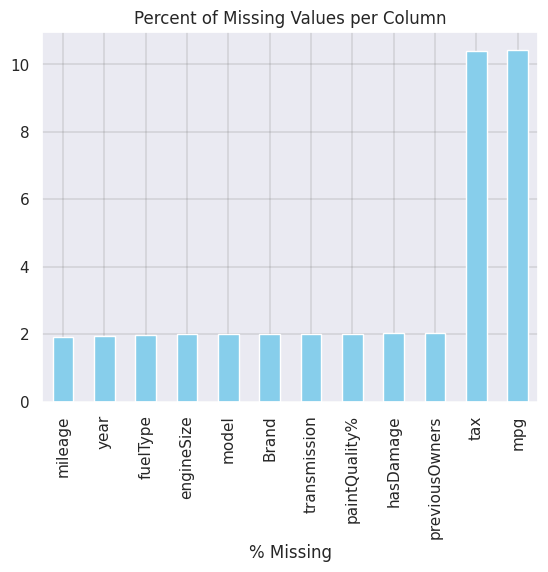

In [23]:
missing = train_data.isnull().mean() * 100
missing = missing[missing > 0].sort_values()

missing.plot(kind='bar', color='skyblue')
plt.grid(color='gray', linewidth=0.3, alpha=0.9)
plt.title('Percent of Missing Values per Column')
plt.xlabel('% Missing')
plt.show()

In [24]:
train_data[train_data['tax'].isnull()]

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,volkswagen,Golf,2016.0,22290,semi-auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.0,0.0
20142,ford,Focus,2017.0,18997,manual,20112.0,Petrol,NaN,NaN,2.0,40.0,4.0,0.0
39796,mercedes,C Class,2019.0,31299,semi-auto,1000.0,Diesel,NaN,NaN,2.0,33.0,4.0,0.0
35317,mercedes,C Class,2019.0,26176,NaN,9463.0,Petrol,NaN,NaN,1.5,87.0,1.0,0.0
35004,mercedes,C Class,2016.0,21499,automatic,26741.0,Diesel,NaN,NaN,2.1,80.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24300,ford,Focu,2017.0,17000,manual,26041.0,Diesel,NaN,NaN,2.0,39.0,3.0,0.0
40757,mercedes,C Class,2019.0,28980,automatic,8501.0,Diesel,NaN,NaN,2.0,97.0,3.0,0.0
19457,NaN,Focus,2019.0,18910,manual,11167.0,Petrol,NaN,NaN,1.0,30.0,4.0,0.0


In [25]:
numeric_features = [
    'price',
    'year',
    'mileage',
    'tax',
    'mpg',
    'engineSize',
    'previousOwners'
]

categorical_features = [
    'Brand',
    'model',
    'transmission',
    'fuelType',
    'hasDamage'
]

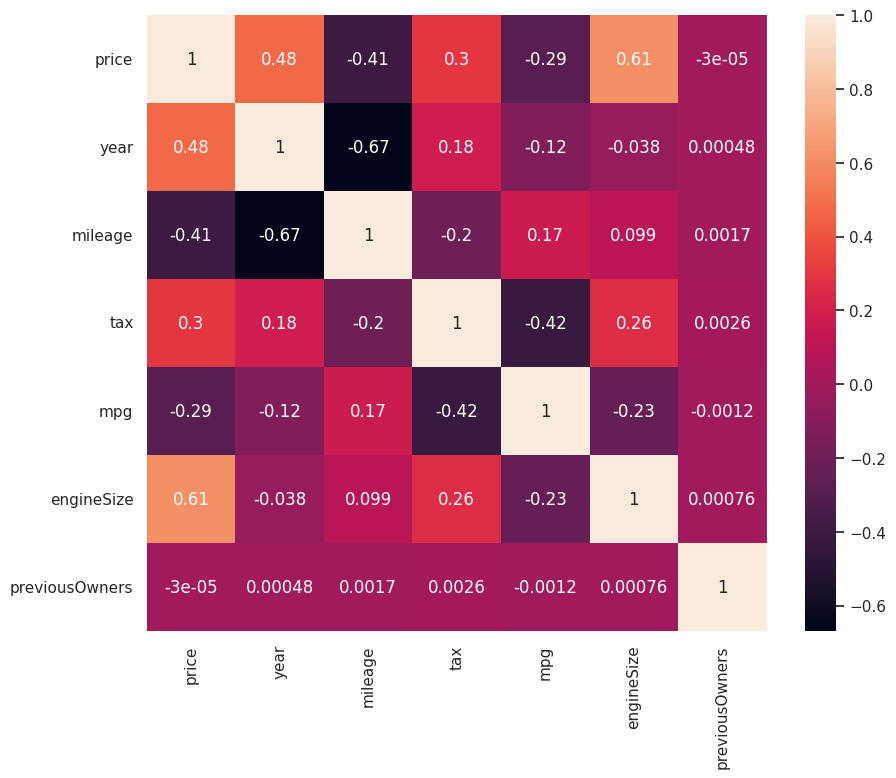

In [26]:
corr = train_data[numeric_features].corr(method="pearson")
fig = plt.figure(figsize=(10, 8))

####
sns.heatmap(data=corr, annot=True, )
####

plt.show()

In [27]:
for column in categorical_features:
    X_train[column] = X_train[column].fillna('Unknown')
    X_val[column] = X_val[column].fillna('Unknown')

In [28]:
#filling with mean
for column in X_train.columns:
    if pd.api.types.is_numeric_dtype(X_train[column]):
        
        #store mean of training data in a variable - in a real application, you may need to store these values for future usages on e.g. test data 
        mean_to_fill = X_train[column].mean()
        
        #fill on X_train
        X_train[column].fillna(mean_to_fill, inplace=True)
        #Fill on X_val
        X_val[column].fillna(mean_to_fill, inplace=True)

In [29]:
train_data.isna().sum()

Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

In [30]:
train_data['fuelType'].unique()

array(['Petrol', 'Diesel', 'etrol', 'Hybrid', 'diesel', 'iesel', nan,
       'petrol', 'PETROL', 'Diese', 'Petro', 'DIESEL', 'petro', 'HYBRID',
       'ybri', 'Other', 'DIESE', 'Hybri', 'ETROL', 'ybrid', 'PETRO',
       'hybrid', 'IESEL', 'Electric', 'ther', 'iese', 'etro', 'ETRO',
       'diese', 'Othe', 'YBRID', 'HYBRI', 'OTHER', 'other', 'IESE'],
      dtype=object)

In [31]:
train_data['fuelType'] = train_data['fuelType'].str.lower().str.strip()
train_data['fuelType'].unique()

array(['petrol', 'diesel', 'etrol', 'hybrid', 'iesel', nan, 'diese',
       'petro', 'ybri', 'other', 'hybri', 'ybrid', 'electric', 'ther',
       'iese', 'etro', 'othe'], dtype=object)

In [32]:
train_data['fuelType'] = train_data['fuelType'].replace ({'etrol': 'petrol',
                                                        'iesel': 'diesel',
                                                        'diesel' : 'diesel',
                                                        'petro' : 'petrol',
                                                        'ybri' : 'hybrid',
                                                        'other' : 'other',
                                                        'hybri': 'hybrid',
                                                        'ybrid': 'hybrid',
                                                        'ther': 'other',
                                                        'iese': 'diesel',
                                                        'etro' : 'petrol',
                                                        'othe' : 'other',
                                                        'diese' : 'diesel'
                                                        })
train_data['fuelType'].unique()

array(['petrol', 'diesel', 'hybrid', nan, 'other', 'electric'],
      dtype=object)

In [33]:
train_data['model'].unique()

array([' Golf', ' Yaris', ' Q2', ' FIESTA', ' 2 Series', '3 Series',
       ' A3', ' Octavia', ' Passat', ' Focus', ' Insignia', ' A Clas',
       ' Q3', ' Fabia', ' A Class', ' Ka+', ' 3 Series', ' GLC Class',
       ' I30', ' C Class', ' Polo', ' E Class', ' C Clas', ' Q5', ' Up',
       ' Fiesta', ' C-HR', ' Mokka X', ' Corsa', ' Astra', ' TT',
       ' 5 Series', ' Aygo', ' 4 Series', ' SLK', ' Viva', ' T-Roc',
       'Focus', ' EcoSport', ' Tucson', ' EcoSpor', nan, ' X-CLASS',
       ' CL Class', ' IX20', ' i20', ' Rapid', ' a1', ' Auris', ' sharan',
       ' I20', ' Adam', ' X3', ' A8', ' GLS Class', ' B-MAX', ' A4',
       ' Kona', ' I10', ' A1', ' Mokka', ' fiesta', ' S-MAX', ' X2',
       ' Crossland X', ' Tiguan', ' A5', ' GLE Class', ' C CLASS',
       ' mokka x', ' Zafira', ' Ioniq', ' A6', ' Mondeo', ' Yeti Outdoor',
       ' X1', 'POLO', ' INSIGNIA', ' Scala', ' S Class', ' 1 Series',
       ' Kamiq', ' Kuga', ' Tourneo Connect', ' Q7', ' GLA Class',
       ' Arteon', ' 

In [34]:
train_data['model'] = train_data['model'].str.lower().str.strip()
train_data['model'].unique()

array(['golf', 'yaris', 'q2', 'fiesta', '2 series', '3 series', 'a3',
       'octavia', 'passat', 'focus', 'insignia', 'a clas', 'q3', 'fabia',
       'a class', 'ka+', 'glc class', 'i30', 'c class', 'polo', 'e class',
       'c clas', 'q5', 'up', 'c-hr', 'mokka x', 'corsa', 'astra', 'tt',
       '5 series', 'aygo', '4 series', 'slk', 'viva', 't-roc', 'ecosport',
       'tucson', 'ecospor', nan, 'x-class', 'cl class', 'ix20', 'i20',
       'rapid', 'a1', 'auris', 'sharan', 'adam', 'x3', 'a8', 'gls class',
       'b-max', 'a4', 'kona', 'i10', 'mokka', 's-max', 'x2',
       'crossland x', 'tiguan', 'a5', 'gle class', 'zafira', 'ioniq',
       'a6', 'mondeo', 'yeti outdoor', 'x1', 'scala', 's class',
       '1 series', 'kamiq', 'kuga', 'tourneo connect', 'q7', 'gla class',
       'arteon', 'sl class', 'santa fe', 'grandland x', 'i800', 'rav4',
       'touran', 'citigo', 'focu', 'roomster', 'prius', 'corolla',
       'fiest', 'b class', 'q', 'kodiaq', 'v class', 'e clas',
       'caddy max

In [35]:
train_data['model'] = train_data['model'].replace({'a clas': 'a class',
                                                    'c clas': 'c class',
                                                    'e clas': 'e class',
                                                    'gle clas': 'gle class',
                                                    'gla clas': 'gla class',
                                                    'cls clas': 'cls class',
                                                    'glc clas': 'glc class',
                                                    'x-clas': 'x-class',
                                                    'yeti outdoo': 'yeti outdoor',
                                                    'tigua': 'tiguan',
                                                    't-ro': 't-roc',
                                                    'tiguan allspac': 'tiguan allspace',
                                                    'astr': 'astra',
                                                    'fiest': 'fiesta',
                                                    'insigni': 'insignia',
                                                    'octavi': 'octavia',
                                                    'monde': 'mondeo',
                                                    'passa': 'passat',
                                                    'c clas': 'c class',
                                                    'edg': 'edge',
                                                    'mokk': 'mokka',
                                                    'b clas': 'b class',
                                                    'v clas': 'v class',
                                                    'gls clas': 'gls class',
                                                    'm clas': 'm class',
                                                    'sl clas': 'sl class',
                                                    'cl clas': 'cl class',
                                                    'combo lif': 'combo life',
                                                    'caddy maxi lif': 'caddy maxi life',
                                                    'c-ma': 'c-max',
                                                    'b-ma': 'b-max',
                                                    'grand c-ma': 'grand c-max',
                                                    'arteo': 'arteon',
                                                    'aur': 'auris',
                                                    'fabi': 'fabia',
                                                    'ayg': 'aygo',
                                                    'gol': 'golf',
                                                    'coroll': 'corolla',
                                                    'zafir': 'zafira',
                                                    'tourneo custo': 'tourneo custom',
                                                    'grand tourneo connec': 'grand tourneo connect',
                                                    'edg' : 'edge'
                                                    })

                                              
train_data['model'].unique()

array(['golf', 'yaris', 'q2', 'fiesta', '2 series', '3 series', 'a3',
       'octavia', 'passat', 'focus', 'insignia', 'a class', 'q3', 'fabia',
       'ka+', 'glc class', 'i30', 'c class', 'polo', 'e class', 'q5',
       'up', 'c-hr', 'mokka x', 'corsa', 'astra', 'tt', '5 series',
       'aygo', '4 series', 'slk', 'viva', 't-roc', 'ecosport', 'tucson',
       'ecospor', nan, 'x-class', 'cl class', 'ix20', 'i20', 'rapid',
       'a1', 'auris', 'sharan', 'adam', 'x3', 'a8', 'gls class', 'b-max',
       'a4', 'kona', 'i10', 'mokka', 's-max', 'x2', 'crossland x',
       'tiguan', 'a5', 'gle class', 'zafira', 'ioniq', 'a6', 'mondeo',
       'yeti outdoor', 'x1', 'scala', 's class', '1 series', 'kamiq',
       'kuga', 'tourneo connect', 'q7', 'gla class', 'arteon', 'sl class',
       'santa fe', 'grandland x', 'i800', 'rav4', 'touran', 'citigo',
       'focu', 'roomster', 'prius', 'corolla', 'b class', 'q', 'kodiaq',
       'v class', 'caddy maxi life', 'superb', 'getz', 'combo life',
     

In [36]:
train_data['fuelType'].unique()
train_data['fuelType'].value_counts()

fuelType
petrol      41181
diesel      30885
hybrid       2225
other         167
electric        4
Name: count, dtype: int64

In [37]:
train_data['fuelType'].isna().sum()

1511

In [38]:
# Now, let's fill the NaN values in the 'fuelType' column with 'Unknown'
train_data['fuelType'].fillna("Unknown", inplace=True)

# Verify the changes
print(train_data['fuelType'].isna().sum())
print(train_data['fuelType'].unique())

0
['petrol' 'diesel' 'hybrid' 'Unknown' 'other' 'electric']


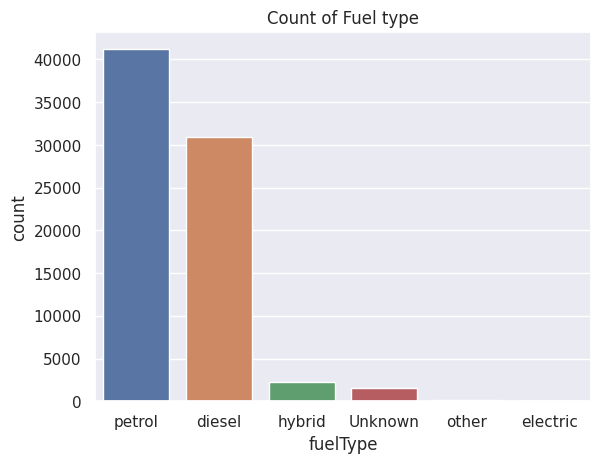

In [39]:
plt.title("Count of Fuel type")
sns.countplot(x=train_data["fuelType"], data=train_data, hue="fuelType")
plt.show()
#drop no other? 0,22% do dataset
#nan para unknown 2% dataset

In [40]:
train_data["transmission"].unique()
train_data["transmission"].value_counts()

transmission
manual       41627
semi-auto    16872
automatic    15211
unknown        736
other            5
Name: count, dtype: int64

In [41]:
# Now, let's fill the NaN values in the 'Transmission' column with 'unknown'
train_data['transmission'].fillna("unknown", inplace=True)

# Verify the changes
print(train_data['transmission'].isna().sum())
print(train_data['transmission'].unique())

0
['semi-auto' 'manual' 'automatic' 'unknown' 'other']


In [42]:
#Since the number of objects in the category "other" is insignificant, we will drop them from our data set:
train_data.drop(train_data[train_data["transmission"] == "other"].index, inplace=True)

#Verify the changes
print(train_data['transmission'].isna().sum())
print(train_data['transmission'].unique())

0
['semi-auto' 'manual' 'automatic' 'unknown']


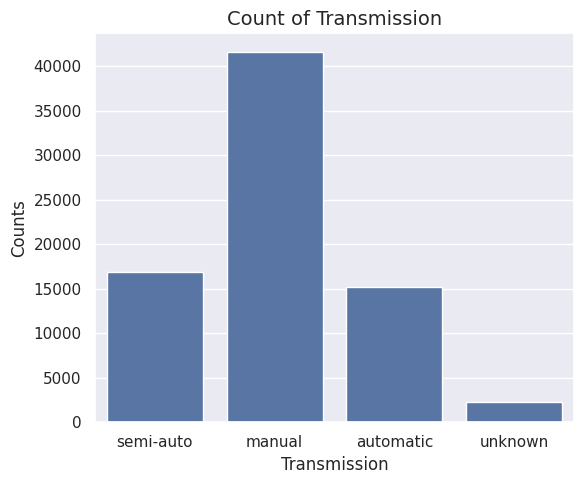

In [43]:
plt.figure(figsize=(6, 5))

sns.countplot(x="transmission", data=train_data)
plt.xlabel("Transmission", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.title("Count of Transmission", fontsize=14)

plt.tight_layout()
plt.show()

In [44]:
train_data.isna().sum()

Brand             1521
model             1517
year              1491
price                0
transmission         0
mileage           1463
fuelType             0
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

In [45]:
train_data.isna().mean() * 100

Brand              2.002159
model              1.996893
year               1.962668
price              0.000000
transmission       0.000000
mileage            1.925811
fuelType           0.000000
tax               10.404381
mpg               10.433340
engineSize         1.995577
paintQuality%      2.006108
previousOwners     2.040333
hasDamage          2.037700
dtype: float64

In [46]:
train_data['tax']

carID
69512      NaN
53000    145.0
6366     145.0
29021    145.0
10062    145.0
         ...  
37194    125.0
6265     200.0
54886    145.0
860      125.0
15795    145.0
Name: tax, Length: 75968, dtype: float64

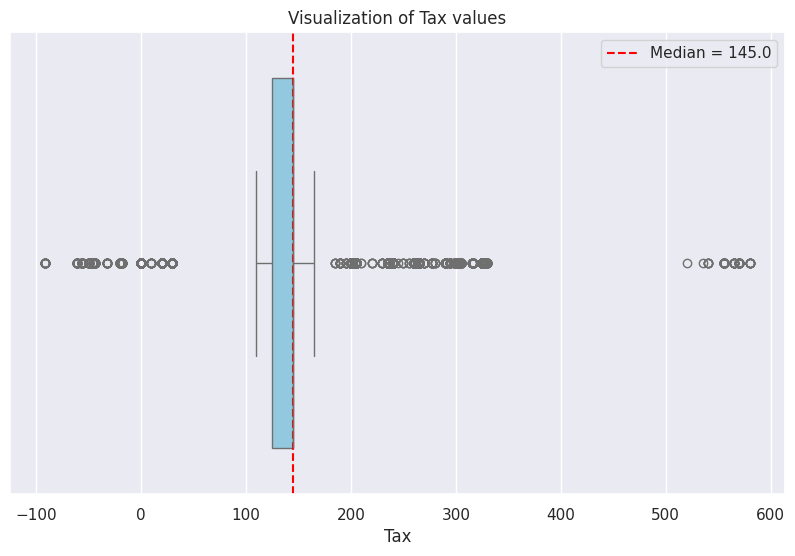

In [47]:
plt.figure(figsize=(10,6))

# Boxplot
sns.boxplot(x=train_data['tax'], color='skyblue')

# Calcula a mediana
median = train_data['tax'].median()

# Adiciona uma linha vermelha para a mediana
plt.axvline(median, color='red', linestyle='--', label=f'Median = {median}')

plt.title(f'Visualization of Tax values')
plt.xlabel('Tax')
plt.legend()
plt.show()

NameError: name 'mpg' is not defined

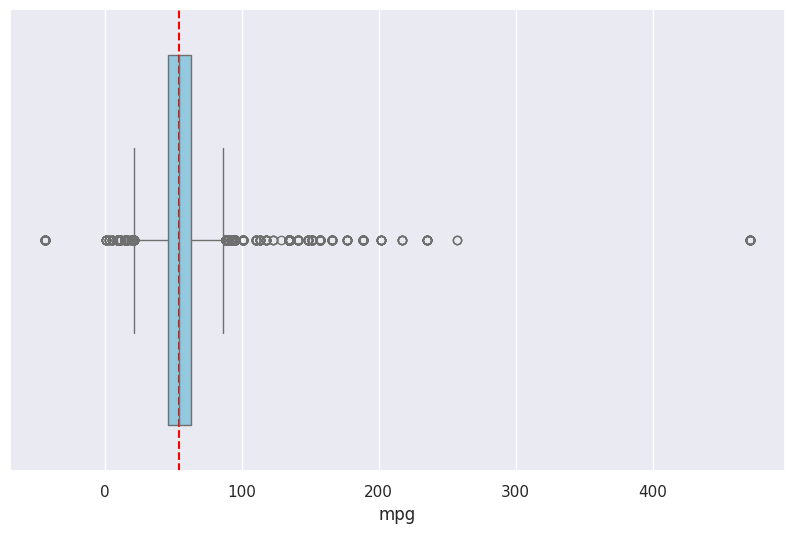

In [67]:
plt.figure(figsize=(10,6))

sns.boxplot(x=train_data['mpg'], color='skyblue')


median = train_data['mpg'].median()

# Adiciona uma linha vermelha para a mediana
plt.axvline(median, color='red', linestyle='--', label=f'Median = {median}')

plt.title(f'Visualization of MPG values {mpg}')
plt.xlabel(coluna)
plt.legend()
plt.show()

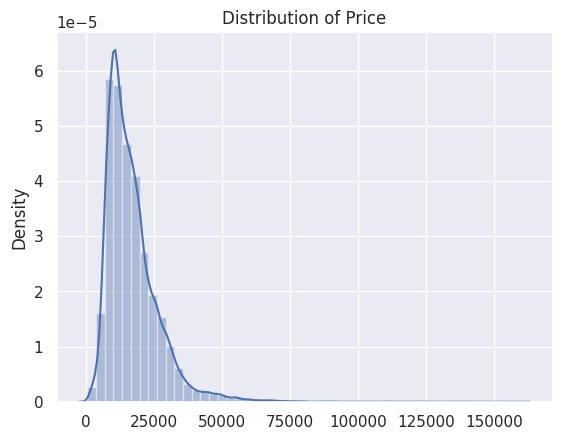

In [51]:
#distribution before outliers removing
sns.distplot(x=train_data["price"], kde=True)  # kde=True adds the KDE curve along with the histogram
plt.title("Distribution of Price")
plt.show()

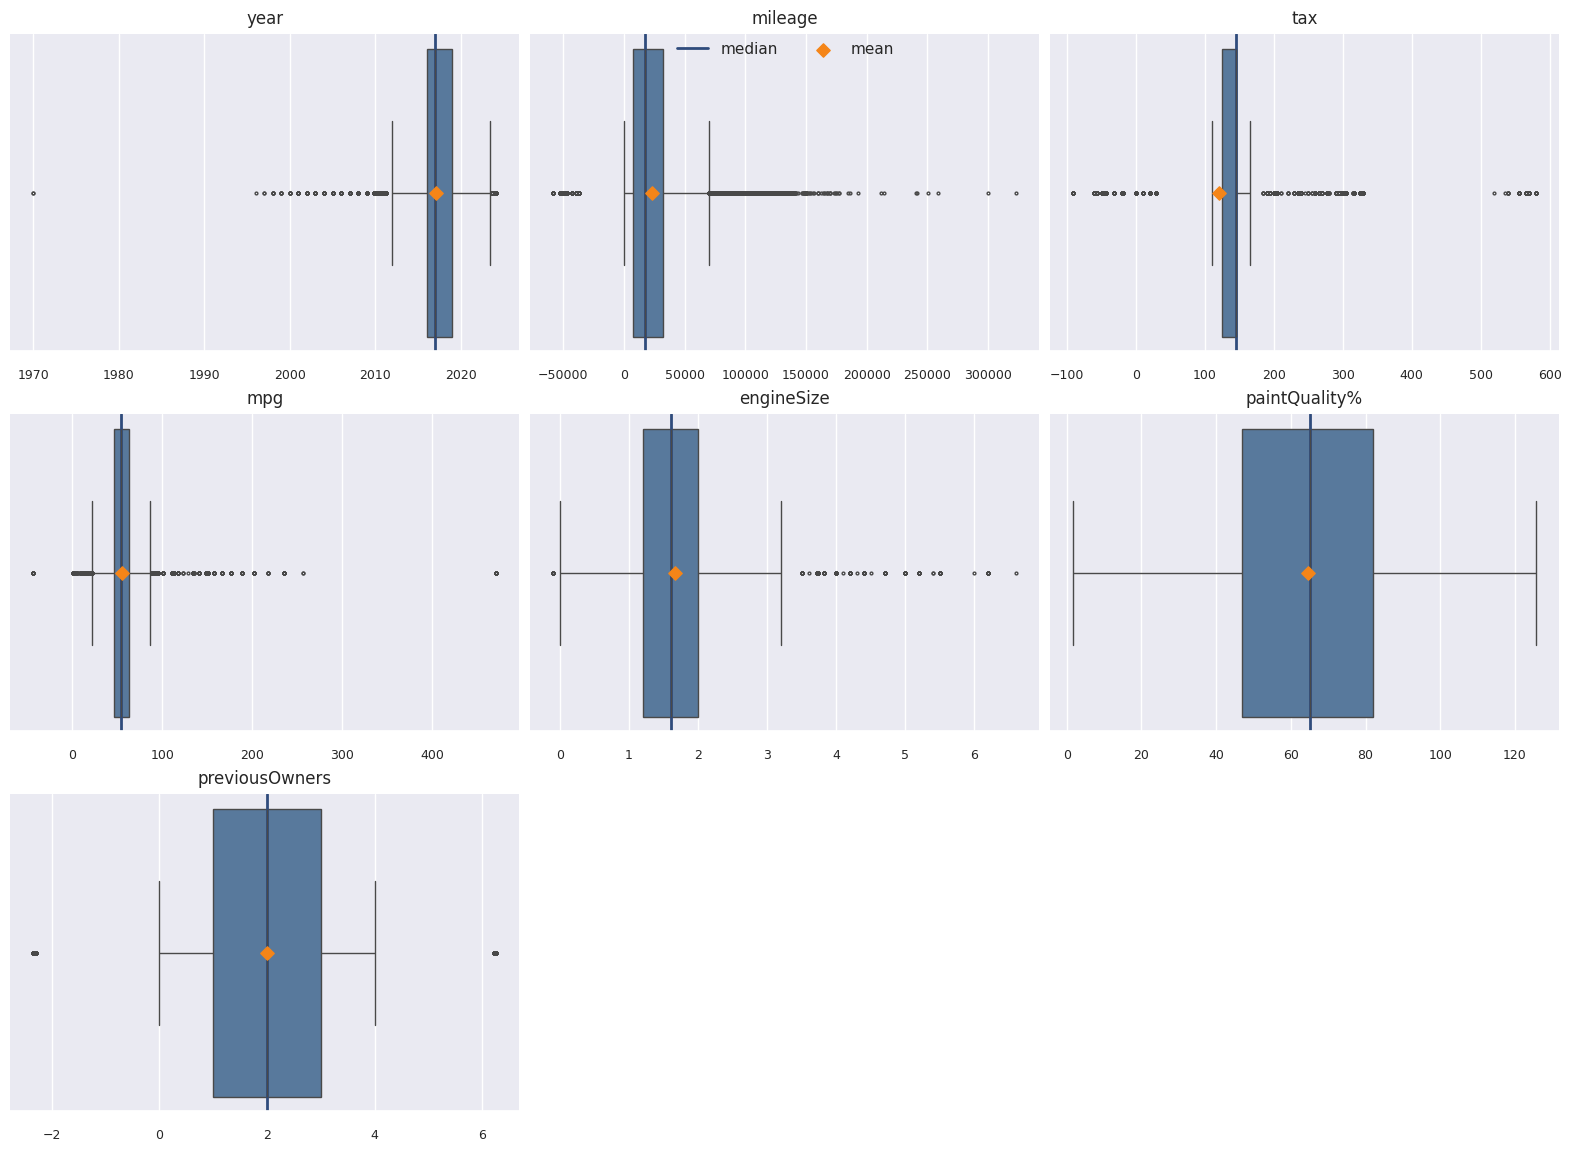

In [57]:
target_cols = ["year", "mileage", "tax", "mpg", "engineSize", "paintQuality%", "previousOwners"]

# Data Preparation & Filtering (Single expression)
data = [
    train_data[c].apply(pd.to_numeric, errors="coerce").dropna()
    for c in target_cols if c in train_data.columns and not train_data[c].apply(pd.to_numeric, errors="coerce").dropna().empty
]
n = len(data)

# Figure Setup
cols, rows = 3, int(np.ceil(n / 3))
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5.2, rows * 3.8), constrained_layout=True)
axes = np.ravel(axes) if rows * cols > 1 else [axes]

# Plotting Loop (Dense iteration)
[
    (
        sns.boxplot(x=s, color="#4C78A8", orient="h", fliersize=2, ax=ax),
        ax.axvline(s.median(), color="#2F4B7C", lw=2),
        ax.scatter(s.mean(), np.mean(ax.get_ylim()), marker="D", color="#F58518", s=46, zorder=3),
        ax.set_title(s.name, pad=8),
        ax.set_xlabel(""),
        ax.tick_params(axis="x", labelsize=9, pad=6),
        ax.tick_params(axis="y", length=0),
        sns.despine(ax=ax, left=True)
    )
    for ax, s in zip(axes, data)
]

# Cleanup and Legend
[ax.axis("off") for ax in axes[n:]] # Turn off unused axes

# Legend Proxies
median_proxy, = axes[0].plot([], [], color="#2F4B7C", lw=2, label="median")
mean_proxy = axes[0].scatter([], [], marker="D", color="#F58518", s=46, label="mean")

fig.legend(handles=[median_proxy, mean_proxy], loc="upper center", ncol=2, frameon=False, bbox_to_anchor=(0.5, 0.98))
plt.show()

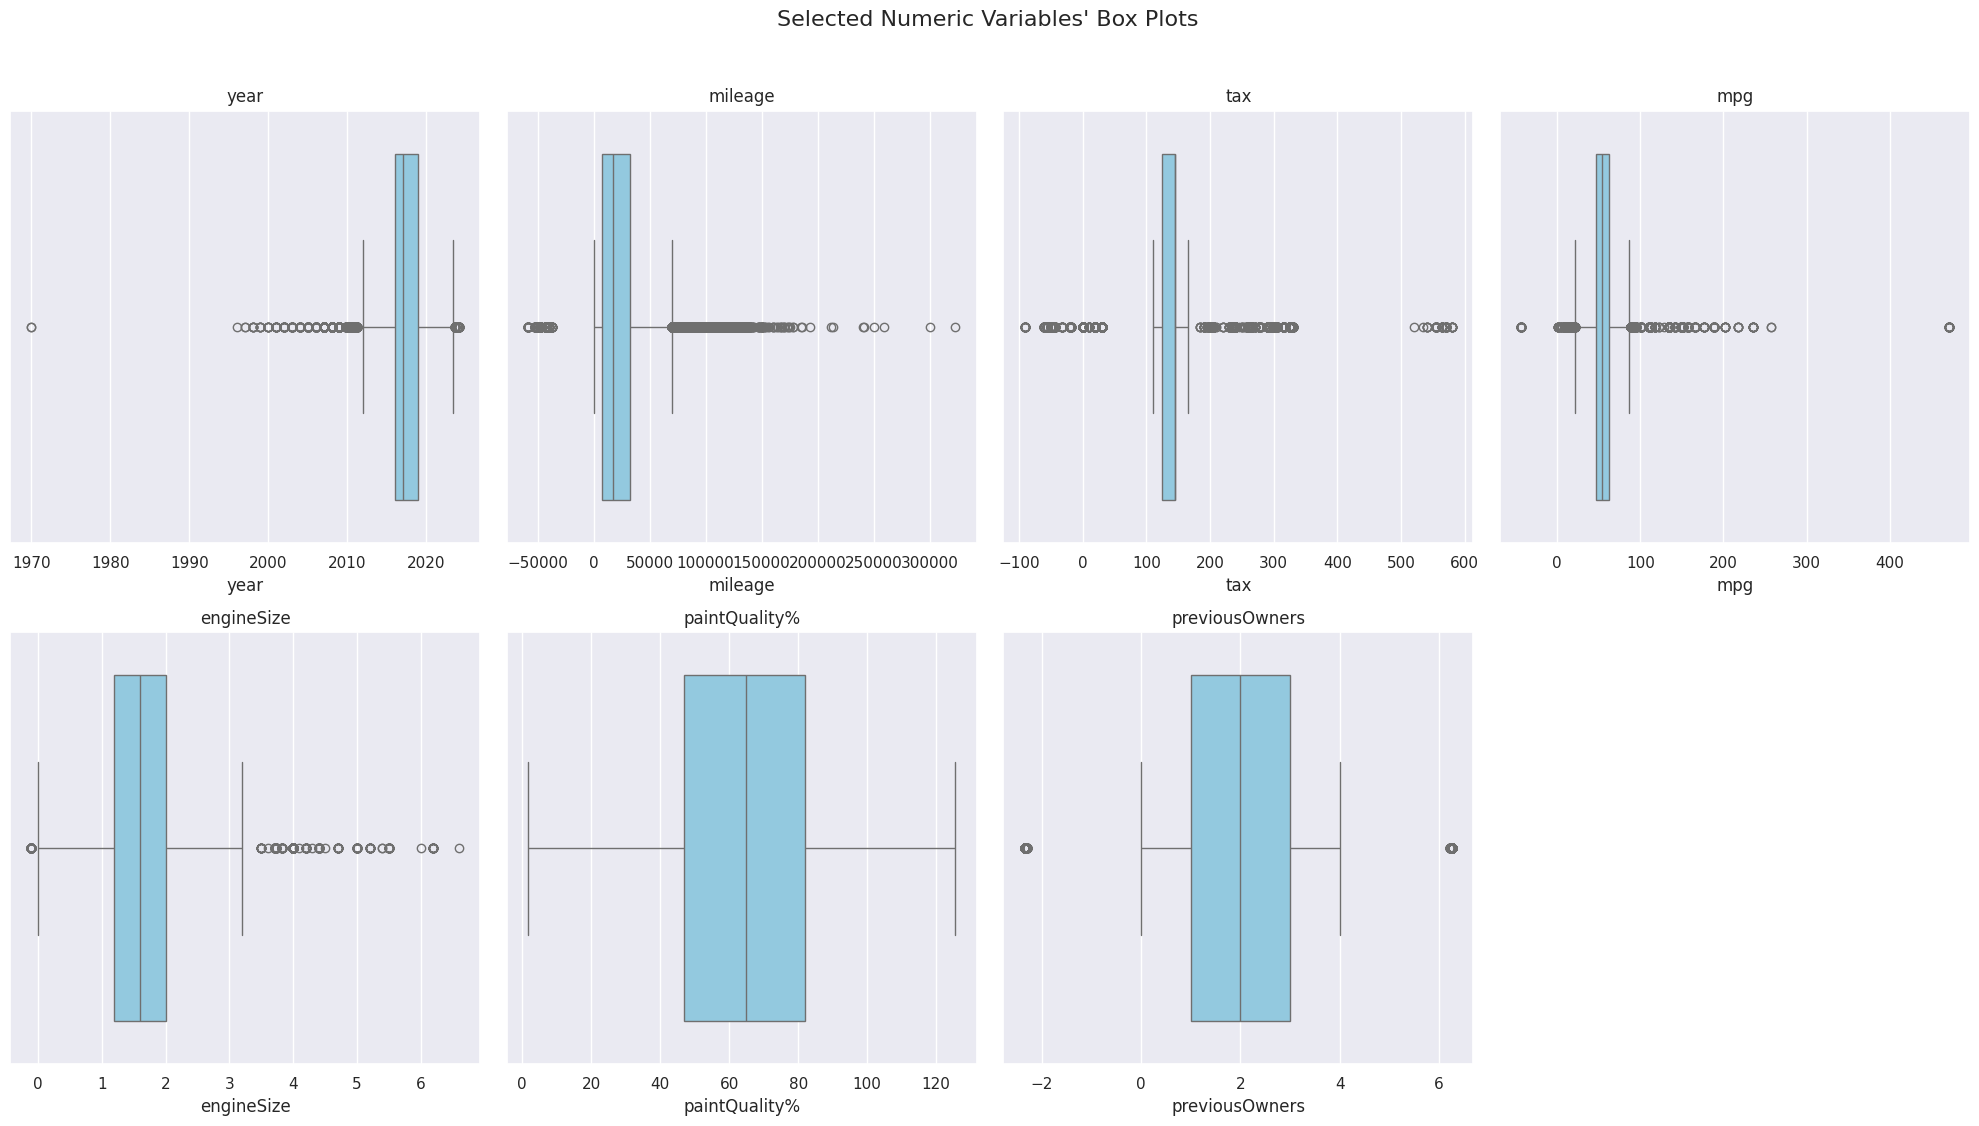

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil

sns.set()

selected_features = ["year", "mileage", "tax", "mpg", "engineSize", "paintQuality%", "previousOwners"]

sp_rows = 2
sp_cols = ceil(len(selected_features) / sp_rows)  #round up to an integer

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

for ax, feat in zip(axes.flatten(), selected_features):
    sns.boxplot(x=train_data[feat], ax=ax, color='skyblue')
    ax.set_title(feat)

for ax in axes.flatten()[len(selected_features):]:
    fig.delaxes(ax)

plt.suptitle("Selected Numeric Variables' Box Plots", fontsize=16, y=1.02)

save_path = os.path.join('..', 'figures', 'eda')
if not os.path.exists(save_path):
    os.makedirs(save_path)

plt.savefig(os.path.join(save_path, 'selected_numeric_boxplots.png'), dpi=200, bbox_inches='tight')

plt.show()

In [74]:
#Fix outliers such as negative mileage and previousOwners , at train data frame
train_data[train_data['mileage'] >= 0]
train_data[train_data['previousOwners'] >= 0]

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,volkswagen,golf,2016.0,22290,semi-auto,28421.000000,petrol,NaN,11.417268,2.0,63.0,4.0,0.0
53000,toyota,yaris,2019.0,13790,manual,4589.000000,petrol,145.0,47.900000,1.5,50.0,1.0,0.0
6366,audi,q2,2019.0,24990,semi-auto,3624.000000,petrol,145.0,40.900000,1.5,56.0,4.0,0.0
10062,bmw,2 series,2019.0,22995,manual,1000.000000,petrol,145.0,42.800000,1.5,97.0,3.0,0.0
14704,bmw,3 series,2014.0,8199,manual,101153.348285,diesel,30.0,65.700000,2.0,74.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,mercedes,c class,2015.0,13498,manual,14480.000000,petrol,125.0,53.300000,2.0,78.0,0.0,0.0
6265,audi,q3,2013.0,12495,semi-auto,52134.000000,diesel,200.0,47.900000,2.0,38.0,2.0,0.0
54886,toyota,aygo,2017.0,8399,automatic,11304.000000,petrol,145.0,67.000000,1.0,57.0,3.0,0.0


In [75]:
train_data.head()

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,volkswagen,golf,2016.0,22290,semi-auto,28421.0,petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,toyota,yaris,2019.0,13790,manual,4589.0,petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,audi,q2,2019.0,24990,semi-auto,3624.0,petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,ford,fiesta,2018.0,12500,manual,9102.0,petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,bmw,2 series,2019.0,22995,manual,1000.0,petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=73598915-7418-44c0-8dc3-75c1aee4b4e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>